# Rodar inicialmente

In [1]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Exercício 1



Vamos plotar a função $f(x) = e^{-x^2}$

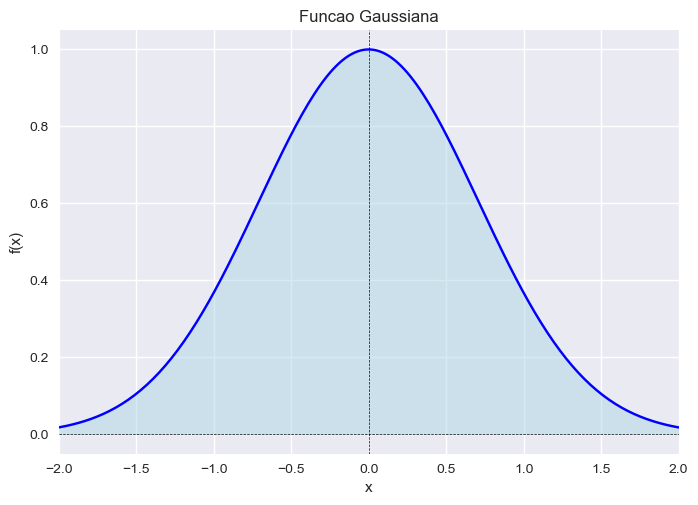

In [12]:
def egh(x):
    return np.exp(-x**2)

x = linspace(-10,10,1000)

plt.plot(x,egh(x),label='e^(-x^2)',color='blue')
plt.title('Funcao Gaussiana')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2,2)
plt.style.use('seaborn-v0_8')
plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
plt.fill_between(x,egh(x),where=(x>=-10) & (x<=10),color='lightblue',alpha=0.5)
plt.show()

In [37]:
Intergal_real = sp.integrate(sp.E**(-1*sp.Symbol('x')**2), (sp.Symbol('x'), -1, 1))
print(f"Integral real: {Intergal_real.evalf()}")

Integral real: 1.49364826562485


### Método dos trapezios



In [38]:
# Função para o método dos trapézios
def trapezio(f, a, b, n):
    """
    Aproxima a integral de uma função f no intervalo [a, b] usando o método dos trapézios.
    
    Parâmetros:
    f: função a ser integrada.
    a: limite inferior da integral.
    b: limite superior da integral.
    n: número de subintervalos.
    
    Retorna:
    Aproximação da integral definida de f de a a b.
    """
    # Comprimento do intervalo dividido por n
    h = (b - a) / n
    
    # Soma inicial com as contribuições das extremidades
    soma = 0.5 * (f(a) + f(b))
    
    # Soma as contribuições dos pontos intermediários
    for i in range(1, n):
        soma += f(a + i * h)
    
    # Multiplica pela largura do intervalo dividido
    integral = soma * h
    return integral

# Definir limites e número de subintervalos
a = -1  # Limite inferior
b = 1  # Limite superior
n = 1000  # Número de subintervalos

def f(x):
    return np.exp(-x**2)

# Calcular a integral usando o método dos trapézios
resultado_trapezio = trapezio(f, a, b, n)

print(f"numero de subintervalos: {n}")
print(f"A aproximação da integral é: {resultado_trapezio}")
print(f"A integral real é: {Intergal_real.evalf()}")
# Calcular o erro

erro = abs(resultado_trapezio - Intergal_real.evalf())
print(f"O erro da aproximação é: {erro}")


numero de subintervalos: 1000
A aproximação da integral é: 1.4936477751188677
A integral real é: 1.49364826562485
O erro da aproximação é: 4.90505986272538E-7


### Método de Simpson

In [41]:
# Função para o método de Simpson de segunda ordem
def simpson(f, a, b, n):
    """
    Aproxima a integral de uma função f no intervalo [a, b] usando o método de Simpson de segunda ordem (1/3).
    
    Parâmetros:
    f: função a ser integrada.
    a: limite inferior da integral.
    b: limite superior da integral.
    n: número de subintervalos (deve ser par).
    
    Retorna:
    Aproximação da integral definida de f de a a b.
    """
    if n % 2 == 1:  # Verifica se n é par
        raise ValueError("O número de subintervalos n deve ser par.")
    
    h = (b - a) / n  # Comprimento de cada subintervalo
    
    # Soma inicial com as contribuições das extremidades
    soma = f(a) + f(b)
    
    # Soma as contribuições dos pontos ímpares (multiplicados por 4)
    for i in range(1, n, 2):
        soma += 4 * f(a + i * h)
    
    # Soma as contribuições dos pontos pares (multiplicados por 2)
    for i in range(2, n, 2):
        soma += 2 * f(a + i * h)
    
    # Multiplica pela largura do intervalo dividido por 3
    integral = soma * h / 3
    return integral

def f(x):
    return np.exp(-x**2)

# Definir limites e número de subintervalos (deve ser par)
a = -1  # Limite inferior
b = 1  # Limite superior
n = 1000  # Número de subintervalos (deve ser par)

# Calcular a integral aproximada usando o método de Simpson
resultado_aproximado = simpson(f, a, b, n)

# Calcular o erro absoluto
erro_absoluto = abs(resultado_aproximado - Intergal_real.evalf())

# Exibir os resultados
print(f"numero de subintervalos: {n}")
print(f"Aproximação da integral (Simpson): {resultado_aproximado}")
print(f"Erro absoluto: {erro_absoluto}")


numero de subintervalos: 1000
Aproximação da integral (Simpson): 1.4936482656251162
Erro absoluto: 2.62234678416462E-13


### Método Adaptativo de Simpson

In [44]:
def simpson_adaptativo(f, a, b, epsilon, n_max=100):
    """
    Aproxima a integral de uma função f no intervalo [a, b] usando o método adaptativo de Simpson.
    
    Parâmetros:
    f: função a ser integrada.
    a: limite inferior da integral.
    b: limite superior da integral.
    epsilon: erro tolerado (critério de parada).
    n_max: número máximo de subdivisões recursivas (limite para evitar recursão infinita).
    
    Retorna:
    Aproximação da integral definida de f de a a b, e o número de subdivisões feitas.
    """
    # Contador de subdivisões
    subdivisoes = 0
    
    # Função interna para calcular a integral usando Simpson no intervalo [a, b]
    def simpson_1_3(f, a, b):
        c = (a + b) / 2
        h = b - a
        return (h / 6) * (f(a) + 4*f(c) + f(b))
    
    # Função recursiva para o método adaptativo
    def adaptativo(f, a, b, epsilon, integral_total, n_max):
        nonlocal subdivisoes  # Acessa o contador externo
        
        c = (a + b) / 2
        
        # Aproximação usando o método de Simpson para o intervalo [a, b]
        integral_ab = simpson_1_3(f, a, b)
        
        # Aproximações para os subintervalos [a, c] e [c, b]
        integral_ac = simpson_1_3(f, a, c)
        integral_cb = simpson_1_3(f, c, b)
        
        # Se a soma das integrais dos subintervalos for suficientemente precisa, aceitamos
        if abs(integral_ac + integral_cb - integral_ab) < 15 * epsilon:
            subdivisoes += 1  # Incrementa o contador de subdivisões
            return integral_ac + integral_cb
        # Caso contrário, subdividimos ainda mais
        elif n_max > 0:
            subdivisoes += 2  # Subdividiu duas vezes (uma para [a, c] e uma para [c, b])
            left_integral = adaptativo(f, a, c, epsilon / 2, integral_total, n_max - 1)
            right_integral = adaptativo(f, c, b, epsilon / 2, integral_total, n_max - 1)
            return left_integral + right_integral
        else:
            return integral_ac + integral_cb
    
    # Começar a recursão com a integral total
    integral_aproximada = adaptativo(f, a, b, epsilon, 0, n_max)
    
    return integral_aproximada, subdivisoes

# Exemplo de função a ser integrada
def f(x):
    return x**2  # Exemplo de função x^2

# Definir limites e erro tolerado
a = -1  # Limite inferior
b = 1  # Limite superior
epsilon = 1e-7  # Erro tolerado


def f(x):
    return np.exp(-x**2)

# Calcular a integral aproximada usando o método adaptativo de Simpson
resultado_aproximado,n = simpson_adaptativo(f, a, b, epsilon)

# Calcular o erro absoluto
erro_absoluto = abs(resultado_aproximado - Intergal_real.evalf())

# Exibir os resultados
print(f"Numero de subdivisões: {n}")
print(f"Aproximação da integral (Adaptativo de Simpson): {resultado_aproximado}")
print(f"Valor exato da integral: {Intergal_real.evalf()}")
print(f"Erro absoluto: {erro_absoluto}")


Numero de subdivisões: 58
Aproximação da integral (Adaptativo de Simpson): 1.4936482543524008
Valor exato da integral: 1.49364826562485
Erro absoluto: 1.12724531931008E-8
